# Tracking of particles in a microfluidic device using the library Trackpy

### By J.N. Hayek

In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')


import numpy as np
import pandas as pd
from pandas import DataFrame, Series 

import pims
import trackpy as tp
import trackpy.predict


In [16]:
from platform import python_version

print(python_version())

3.7.11


In [2]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel

def trshow(tr, first_style='bo', last_style='gs', style='b.'):
    frames = list(tr.groupby('frame'))
    nframes = len(frames)
    for i, (fnum, pts) in enumerate(frames):
        if i == 0:
            sty = first_style
        elif i == nframes - 1:
            sty = last_style
        else:
            sty = style
        plt.plot(pts.x, pts.y, sty)
    tp.plot_traj(tr, colorby='frame', ax=plt.gca())
    plt.axis('equal'); plt.ylim(ymin=-1.0, ymax=3.5)
    plt.xlabel('x')
    plt.ylabel('y')
    

In [3]:
path = r'./'
  
VideoName="mps_in_channel.mp4"

frames = gray(pims.open(path+VideoName))

In [4]:
len(frames)

242

In [5]:
f = tp.locate(frames[0], 11, invert=True)

In [6]:
f

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,4.203213,7.071722,604.846314,3.044987,0.475391,20.786650,12509.0,0.043875,0
1,4.117416,19.147589,688.896679,3.062003,0.429498,22.594184,12766.0,0.039523,0
2,16.400000,332.160976,185.272311,1.959343,0.284433,14.460278,11052.0,0.116756,0
3,25.354583,72.792627,882.528838,3.266261,0.270503,33.665335,12924.0,0.037251,0
4,25.387573,292.306214,505.431903,3.016272,0.188964,19.656940,12817.0,0.038760,0
5,29.449129,21.611017,401.950539,2.964470,0.286538,15.589987,11792.0,0.063328,0
6,29.427305,430.145666,815.875995,2.905318,0.458309,37.506346,12557.0,0.042991,0
7,31.458877,269.692868,744.478372,3.006266,0.463469,31.405916,12803.0,0.038966,0
8,31.795908,237.853095,861.290305,3.241099,0.334082,35.472869,13399.0,0.031763,0
9,32.558516,468.560010,907.382441,3.256391,0.267318,35.472869,13179.0,0.034089,0


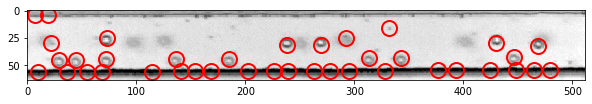

In [7]:
tp.annotate(f, frames[0]);

(array([1., 0., 1., 2., 6., 3., 1., 2., 2., 0., 0., 0., 0., 0., 0., 0., 1.,
        3., 9., 8.]),
 array([ 185.2723112 ,  270.74611037,  356.21990955,  441.69370873,
         527.16750791,  612.64130709,  698.11510626,  783.58890544,
         869.06270462,  954.5365038 , 1040.01030297, 1125.48410215,
        1210.95790133, 1296.43170051, 1381.90549968, 1467.37929886,
        1552.85309804, 1638.32689722, 1723.8006964 , 1809.27449557,
        1894.74829475]),
 <BarContainer object of 20 artists>)

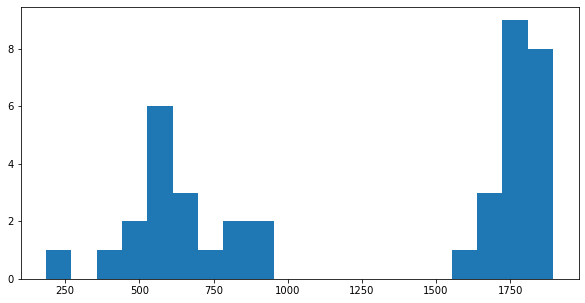

In [8]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

/home/nico/miniconda3/envs/Tracking/lib/python3.7/site-packages/pims/pyav_reader.py:232: MethodDeprecationWarning: VideoStream.seek is deprecated.
  self._stream.seek(timestamp + self._first_pts)


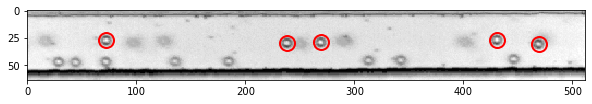

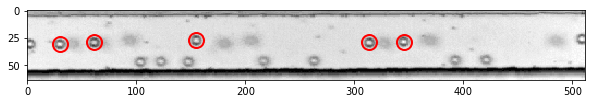

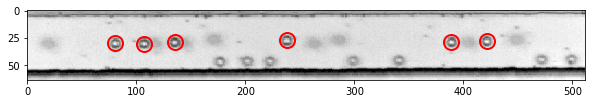

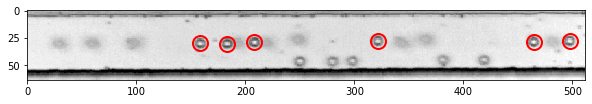

In [24]:


i=0

f0 = tp.locate(frames[i+0], 11, invert=False, maxsize=2)
f1 = tp.locate(frames[i+1], 11, invert=False, maxsize=2)
f2 = tp.locate(frames[i+2], 11, invert=False, maxsize=2)
f3 = tp.locate(frames[i+3], 11, invert=False, maxsize=2)

tp.annotate(f0, frames[i+0]);
tp.annotate(f1, frames[i+1]);
tp.annotate(f2, frames[i+2]);
tp.annotate(f3, frames[i+3]);

Drawing multicolor lines takes awhile. Come back in a minute.


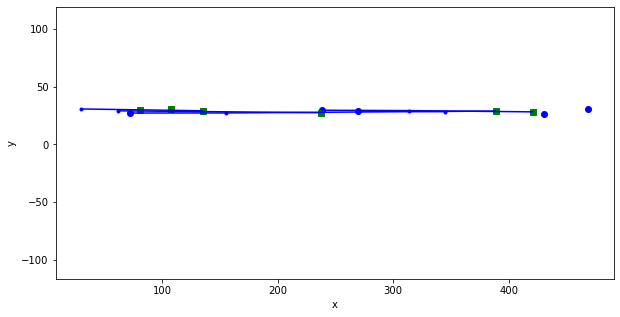

In [26]:
##### Model
Lista = [f0,f1,f2]
@trackpy.predict.predictor
def predict(t1, particle):
    velocity = np.array((150, 0))
    return particle.pos + velocity * (t1 - particle.t)

tr = pd.concat(tp.link_df_iter(Lista, 100, predictor=predict))
trshow(tr)

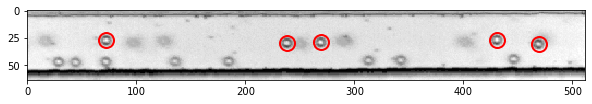

In [11]:
tp.annotate(tr[tr["frame"]==0], frames[0]);

In [12]:
DataCollection = pd.concat(tp.link_df_iter(Lista, 100, predictor=predict))
DataCollection

Frame 2: 6 trajectories present.


,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
21,27.122829,72.065757,124.062752,1.163975,0.482406,23.396449,6788.0,-0.135493,0,0
22,26.695201,430.573281,118.675411,1.187920,0.459594,22.626829,6825.0,-0.141093,0,1
23,28.909375,269.039583,147.767049,1.151539,0.391875,25.705310,6586.0,-0.111361,0,2
24,29.542802,237.874514,158.233882,1.311799,0.352766,23.550373,6380.0,-0.094243,0,3
25,30.517625,468.983302,82.965041,1.057704,0.411630,17.547337,6399.0,-0.095598,0,4
20,27.187717,154.838934,130.877397,1.174764,0.400327,22.444791,6442.0,-0.091332,1,0
21,28.391354,345.201365,133.303861,1.204372,0.430738,23.506369,6697.0,-0.114021,1,2
22,29.035881,61.344774,97.210211,1.128278,0.460433,18.956749,5999.0,-0.067870,1,5
23,29.243697,313.526261,144.374603,1.273106,0.424193,22.748099,6465.0,-0.093001,1,3
24,30.657692,29.515385,157.720154,1.281526,0.442776,25.022909,6750.0,-0.120228,1,6


In [13]:
ListData = []
for i in range(48):
    f0 = tp.locate(frames[i], 11, invert=False, maxsize=2)
    ListData.append(f0)

    DataCollection = pd.concat(tp.link_df_iter(ListData, 100, predictor=predict))

Frame 47: 6 trajectories present.


In [14]:
DataCollection.columns


Index(['y', 'x', 'mass', 'size', 'ecc', 'signal', 'raw_mass', 'ep', 'frame',
       'particle'],
      dtype='object')